## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [2]:
model  = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

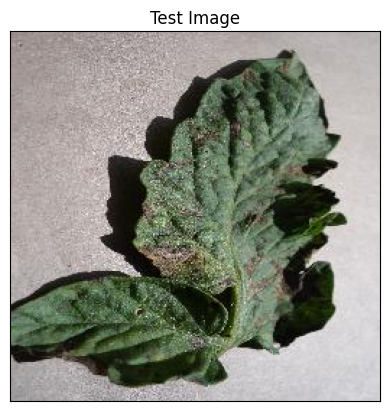

In [4]:
import cv2
image_path = "test/test/TomatoEarlyBlight5.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 628ms/step


(array([[8.4626534e-10, 9.9193984e-01, 8.0582947e-03, 1.3884165e-10,
         1.1483801e-06, 1.0244267e-09, 6.6754899e-07, 1.7644236e-10,
         2.3755982e-12, 3.6596948e-09]], dtype=float32),
 (1, 10))

In [7]:
result_index = np.argmax(prediction)
result_index

1

In [8]:
class_name = ['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

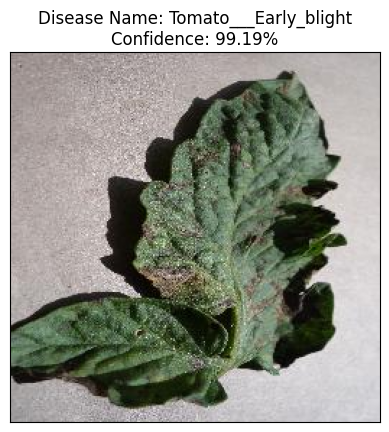

In [11]:
model_prediction = class_name[result_index]
confidence_score = prediction[0][result_index]
confidence_percent = confidence_score * 100

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}\nConfidence: {confidence_percent:.2f}%")
plt.xticks([])
plt.yticks([])
plt.show()


In [12]:
model_prediction

'Tomato___Early_blight'